<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/AplicacionMSE_GRAFICAS_5_Sep_23_rv_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X:
 [[1.09762701]
 [1.43037873]
 [1.20552675]
 [1.08976637]
 [0.8473096 ]
 [1.29178823]
 [0.87517442]
 [1.783546  ]
 [1.92732552]
 [0.76688304]
 [1.58345008]
 [1.05778984]
 [1.13608912]
 [1.85119328]
 [0.14207212]
 [0.1742586 ]
 [0.04043679]
 [1.66523969]]
*****************
y:
 [[ 7.73674426]
 [ 8.62481053]
 [ 9.11065933]
 [ 7.06414083]
 [ 6.8549965 ]
 [ 7.02126894]
 [ 4.07253345]
 [10.0042566 ]
 [10.64641276]
 [ 5.55848409]
 [11.02010485]
 [ 5.71900384]
 [ 7.45402588]
 [ 9.36639598]
 [ 5.95899556]
 [ 5.99213457]
 [ 4.27625781]
 [ 9.37388159]]
*****************
y_pred:
: [[6.71534519]
 [7.78061689]
 [7.06077554]
 [6.69018012]
 [5.91397879]
 [7.33693311]
 [6.00318526]
 [8.91124694]
 [9.37154283]
 [5.65650111]
 [8.27065964]
 [6.58781044]
 [6.83847784]
 [9.12781299]
 [3.65623081]
 [3.75927265]
 [3.33085539]
 [8.532501  ]]
************************
iterations 1: losses=61.07591245075748, ms=0.8274456820884, bs=0.8274456820884
iterations 2: losses=36.43767875135259, ms=1.460133628209241, bs=

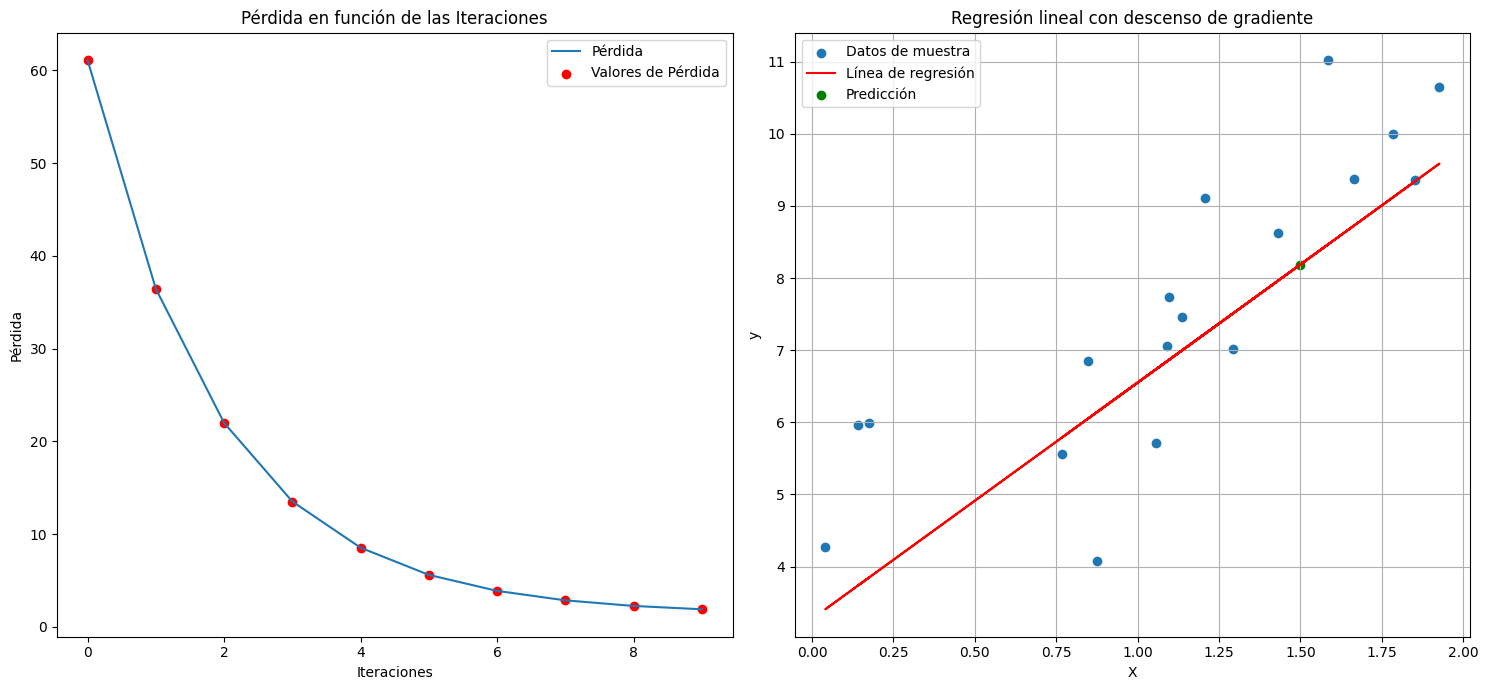

Parámetro m: 3.275325783132032
Parámetro b: 3.275325783132032


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de muestra sintéticos
np.random.seed(0)
X = 2 * np.random.rand(18, 1)
y = 4 + 3 * X + np.random.randn(18, 1)
print("X:\n",X)
print("*****************")
print("y:\n",y)
print("*****************")
# Inicializar parámetros m y b
m = 0
b = 0

# Hiperparámetros del descenso de gradiente
learning_rate = 0.8
iterations = 10

# Listas para guardar los valores de pérdida y parámetros en cada iteración
losses = []
ms = []
bs = []

# Descenso de gradiente tipo Batch
for i in range(iterations):
    # Calcular las predicciones del modelo
    y_pred = m * X + b

    # Cálcular el gradiente de la función de costo (MSE)
    gradient_m = (2/len(X)) * np.mean((y_pred - y) * X)
    gradient_b = (2/len(y)) * np.mean((y_pred - y) * X)

    # Actualizar los parámetros m y b
    m = m - learning_rate * gradient_m
    b = b - learning_rate * gradient_b

    # Calcular y almacenar la pérdida en esta iteración
    loss = np.mean((y_pred - y) ** 2)
    losses.append(loss)
    ms.append(m)
    bs.append(b)

print("y_pred:\n:",y_pred)
print("************************")
#---------------------------------------------------------
# Asumiendo que las tres listas tienen la misma longitud
for i in range(len(losses)):
    print(f"iterations {i + 1}: losses={losses[i]}, ms={ms[i]}, bs={bs[i]}")
# Hacer predicciones en nuevos datos
new_x = np.array([[1.5]])  # Nuevo valor de x
new_y = m * new_x + b

# Graficar la pérdida en función de las iteraciones
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(range(iterations), losses, label='Pérdida')
plt.scatter(range(iterations), losses, c='red', marker='o', label='Valores de Pérdida')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.title('Pérdida en función de las Iteraciones')
plt.legend()

# Graficar los datos y la línea de regresión
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='Datos de muestra')
plt.plot(X, m * X + b, color='red', label='Línea de regresión')
plt.scatter(new_x, new_y, color='green', marker='o', label='Predicción')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión lineal con descenso de gradiente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Imprimir los parámetros finales del modelo
print(f"Parámetro m: {m}")
print(f"Parámetro b: {b}")


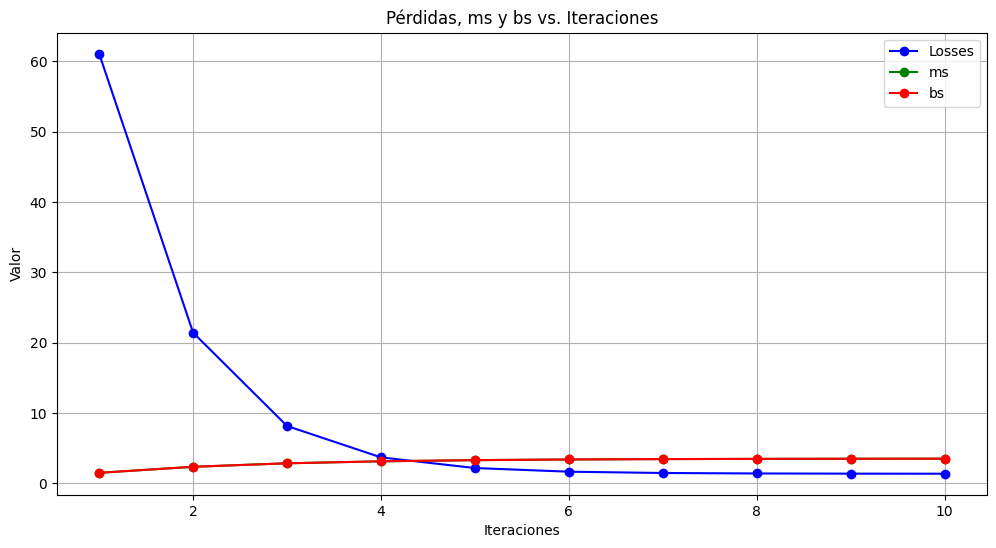

In [ ]:
import matplotlib.pyplot as plt

# Datos
iterations = list(range(1, 11))
losses = [61.07591245075748, 21.417260744308265, 8.147936971878853, 3.6848584006316574, 2.1703809251740815, 1.6488732881074224, 1.465009635113767, 1.3978050822177308, 1.3719479855197394, 1.3613222446409428]
ms = [1.4894022277591201, 2.347789390983349, 2.8425036516815716, 3.1276223140097703, 3.291944748323848, 3.38664869438762, 3.4412294181791574, 3.472685925890062, 3.4908152544996547, 3.5012637301809098]
bs = [1.4894022277591201, 2.347789390983349, 2.8425036516815716, 3.1276223140097703, 3.291944748323848, 3.38664869438762, 3.4412294181791574, 3.472685925890062, 3.4908152544996547, 3.5012637301809098]

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(iterations, losses, marker='o', linestyle='-', color='b', label='Losses')
plt.plot(iterations, ms, marker='o', linestyle='-', color='g', label='ms')
plt.plot(iterations, bs, marker='o', linestyle='-', color='r', label='bs')

# Configurar el gráfico
plt.title('Pérdidas, ms y bs vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()


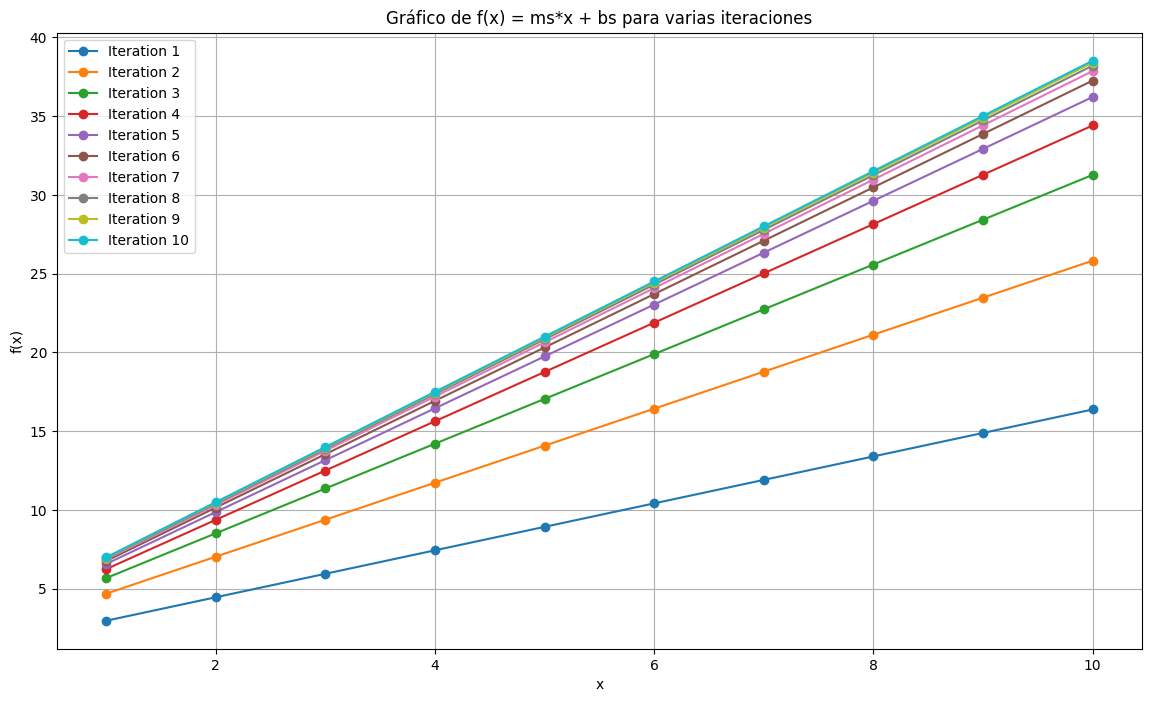

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de las iteraciones
data = [
    {"iteration": 1, "losses": 61.07591245075748, "ms": 1.4894022277591201, "bs": 1.4894022277591201},
    {"iteration": 2, "losses": 21.417260744308265, "ms": 2.347789390983349, "bs": 2.347789390983349},
    {"iteration": 3, "losses": 8.147936971878853, "ms": 2.8425036516815716, "bs": 2.8425036516815716},
    {"iteration": 4, "losses": 3.6848584006316574, "ms": 3.1276223140097703, "bs": 3.1276223140097703},
    {"iteration": 5, "losses": 2.1703809251740815, "ms": 3.291944748323848, "bs": 3.291944748323848},
    {"iteration": 6, "losses": 1.6488732881074224, "ms": 3.38664869438762, "bs": 3.38664869438762},
    {"iteration": 7, "losses": 1.465009635113767, "ms": 3.4412294181791574, "bs": 3.4412294181791574},
    {"iteration": 8, "losses": 1.3978050822177308, "ms": 3.472685925890062, "bs": 3.472685925890062},
    {"iteration": 9, "losses": 1.3719479855197394, "ms": 3.4908152544996547, "bs": 3.4908152544996547},
    {"iteration": 10, "losses": 1.3613222446409428, "ms": 3.5012637301809098, "bs": 3.5012637301809098},
]

# Extraer valores de ms y bs
ms_values = [item["ms"] for item in data]
bs_values = [item["bs"] for item in data]

# Generar datos de x
x = np.arange(1, 11)  # Iteraciones del 1 al 10

# Calcular f(x) para cada iteración
fx_values = [ms * x + bs for ms, bs in zip(ms_values, bs_values)]

# Crear el gráfico
plt.figure(figsize=(14, 8))

for iteration, fx in zip(x, fx_values):
    plt.plot(x, fx, marker='o', label=f'Iteration {iteration}')

# Configurar el gráfico
plt.title('Gráfico de f(x) = ms*x + bs para varias iteraciones')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()


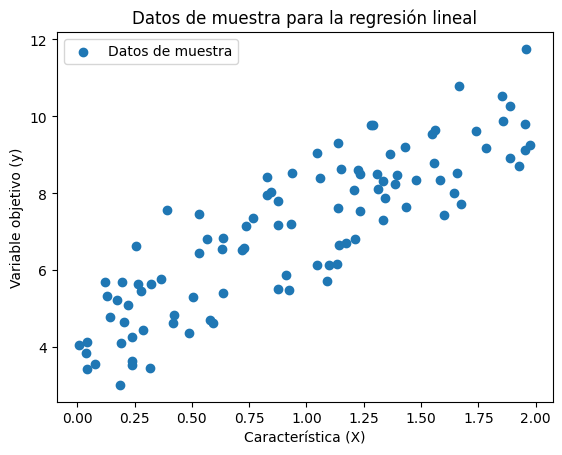

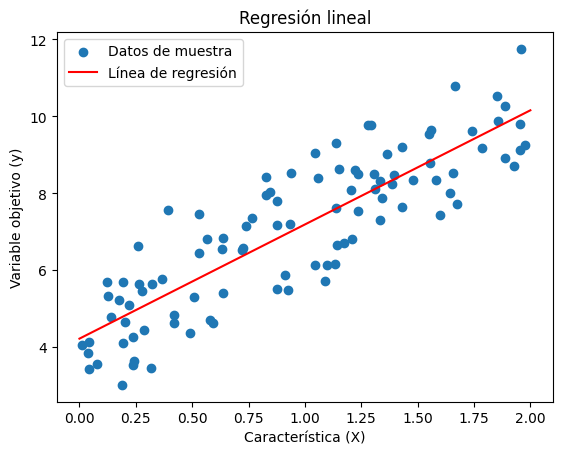

Pendiente (m): 2.968467510701019
Intersección (b): 4.222151077447231


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos sintéticos para la regresión lineal
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Visualizar los datos
plt.scatter(X, y, label='Datos de muestra')
plt.xlabel('Característica (X)')
plt.ylabel('Variable objetivo (y)')
plt.legend()
plt.title('Datos de muestra para la regresión lineal')
plt.show()

# Aplicar regresión lineal
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)  # Ajustar el modelo a los datos

# Realizar predicciones con el modelo
X_nuevo = np.array([[0], [2]])  # Nuevas entradas
y_pred = model.predict(X_nuevo)

# Visualizar la línea de regresión
plt.scatter(X, y, label='Datos de muestra')
plt.plot(X_nuevo, y_pred, 'r-', label='Línea de regresión')
plt.xlabel('Característica (X)')
plt.ylabel('Variable objetivo (y)')
plt.legend()
plt.title('Regresión lineal')
plt.show()

# Imprimir los parámetros aprendidos por el modelo
print(f'Pendiente (m): {model.coef_[0][0]}')
print(f'Intersección (b): {model.intercept_[0]}')


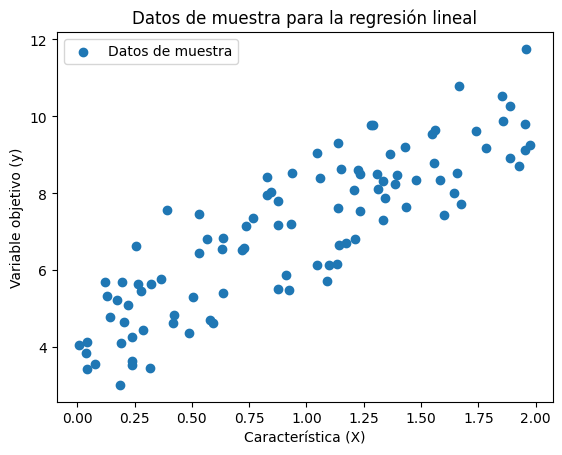

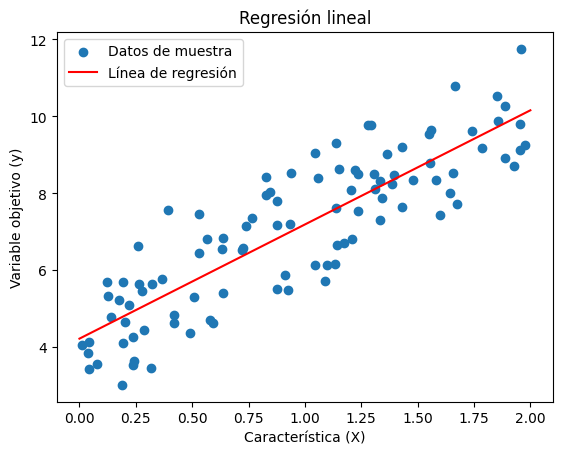

Intersección (b): 4.22215107744723
Pendiente (m): 2.968467510701018


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos sintéticos para la regresión lineal
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Visualizar los datos
plt.scatter(X, y, label='Datos de muestra')
plt.xlabel('Característica (X)')
plt.ylabel('Variable objetivo (y)')
plt.legend()
plt.title('Datos de muestra para la regresión lineal')
plt.show()

# Ajustar la regresión lineal sin scikit-learn
X_b = np.c_[np.ones((100, 1)), X]  # Agregar una columna de unos para el término de sesgo
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Realizar predicciones con el modelo
X_nuevo = np.array([[0], [2]])  # Nuevas entradas
X_nuevo_b = np.c_[np.ones((2, 1)), X_nuevo]  # Agregar una columna de unos
y_pred = X_nuevo_b.dot(theta_best)

# Visualizar la línea de regresión
plt.scatter(X, y, label='Datos de muestra')
plt.plot(X_nuevo, y_pred, 'r-', label='Línea de regresión')
plt.xlabel('Característica (X)')
plt.ylabel('Variable objetivo (y)')
plt.legend()
plt.title('Regresión lineal')
plt.show()

# Imprimir los parámetros aprendidos por el modelo
print(f'Intersección (b): {theta_best[0][0]}')
print(f'Pendiente (m): {theta_best[1][0]}')


In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Generar datos sintéticos
X = np.array([[1], [2], [3]])
y = np.array([2, 4, 6])

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(X, y)

# Realizar predicciones
X_nuevo = np.array([[4]])
y_pred = model.predict(X_nuevo)

print(f'Predicción para X = 4: {y_pred[0]}')

Predicción para X = 4: 7.999999999999999
